In [2]:
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


### Classical Momentum

$$\begin{align}
   v_{t+1} &= \mu v_t - \varepsilon \nabla f(\theta_t) \\
   \theta_{t+1} &= \theta_t + v_{t+1}
\end{align}$$

In [3]:
import numpy as np

In [4]:
x = np.linspace(0, 10, 100)

In [5]:
def grad(x):
    return -5 * x**4

def func(x):
    return -x**5

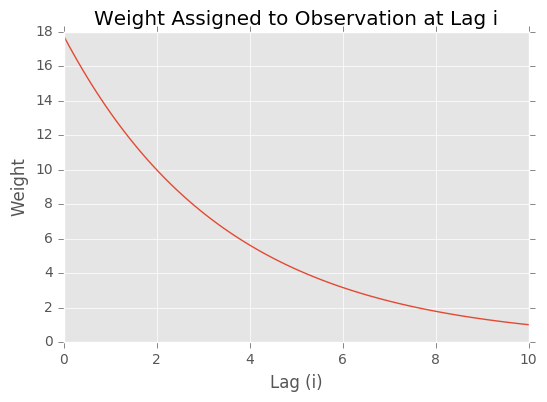

In [6]:
plt.figure()
plt.title('Weight Assigned to Observation at Lag i')
plt.xlabel('Lag (i)')
plt.ylabel('Weight')
plt.plot(x, 0.75**(x-10))
plt.savefig('gradmufunc.png')

In [7]:
x = np.linspace(-1, 1, 100)

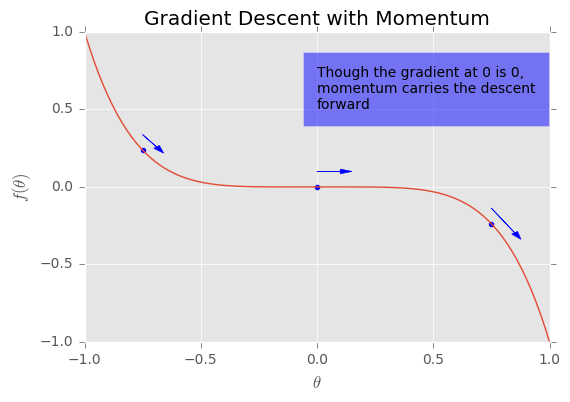

In [8]:
plt.figure()
plt.title('Gradient Descent with Momentum')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot(x, -x**5)
plt.scatter(-0.75, func(-0.75))
plt.arrow(-0.75, func(-0.75) + 0.1, 0.06, 0.05 * grad(-0.75),
          head_width=0.03, head_length=0.05, fc='b', ec='b')

plt.scatter(0, func(0))
plt.arrow(0, func(0) + 0.1, 0.1, 0.1 * grad(0),
          head_width=0.03, head_length=0.05, fc='b', ec='b')

plt.text(0.0, 0.5, 'Though the gradient at 0 is 0,\nmomentum carries the descent\nforward',
        bbox={'facecolor':'blue', 'alpha':0.5, 'pad':10})

plt.scatter(0.75, func(0.75))
plt.arrow(0.75, func(0.75) + 0.1, 0.1, 0.1 * grad(0.75),
          head_width=0.03, head_length=0.05, fc='b', ec='b')
plt.savefig('basicmomentum.png')

### Geometry of Classical Momentum

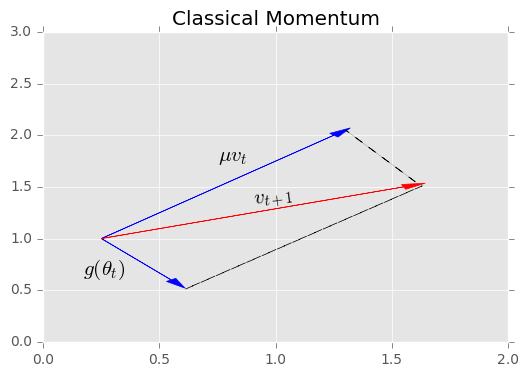

In [9]:
plt.figure()
plt.ylim(0, 3)
plt.xlim(0, 2)
plt.title("Classical Momentum")
plt.arrow(0.25, 1., 1, 1, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(0.25, 1., 0.3,-0.4, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(0.25, 1., 1.3, 0.5, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(1.3, 2.05, 0.3, -0.5,head_width=0.0, head_length=0., linestyle = 'dashed', fc='black', ec='black')
plt.arrow(0.61, 0.51, 1.02, 1., head_width=0.0, head_length=0., linestyle = 'dashed', fc='black', ec='black')

plt.text(0.75, 1.75, r'$\mu v_t$', fontsize=15)
plt.text(0.17, .65, r'$g(\theta_t)$', fontsize=15)
plt.text(0.9, 1.375, r'$v_{t+1}$', fontsize=15, rotation=7)
plt.savefig('cmgeom.png')

## Nesterov's Accelerated Gradient Descent

$$\begin{align}
   v_{t+1} &= \mu v_t - \varepsilon \nabla f(\theta_t + \mu v_t) \\
   \theta_{t+1} &= \theta_t + v_{t+1}
\end{align}$$

In [10]:
x = np.linspace(-1, 1, 100)

In [11]:
def func(x):
    return x**2

def gradn(x):
    return 2*x

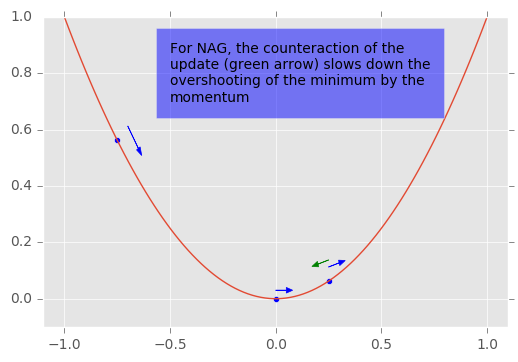

In [12]:
plt.figure()
plt.ylim(-0.1, 1)
plt.xlim(-1.1, 1.1)
plt.plot(x, x**2)

plt.scatter(-0.75, func(-0.75))
plt.arrow(-0.75+0.05, func(-0.75)+0.05, 0.05, 0.05*grad(-.75), fc='b', ec='b')

plt.scatter(0., func(0.))
plt.arrow(-0.+0., func(-0.)+0.03, 0.05, 0.05*grad(-0.), fc='b', ec='b')

plt.scatter(0.25, func(0.25))
plt.arrow(0.25, func(0.25)+0.05, 0.05, -0.75*grad(.25), fc='b', ec='b')

plt.arrow(0.25, func(0.25)+0.075, -0.05, 0.75*grad(.25), fc='g', ec='g')

plt.text(-0.5, 0.7, 'For NAG, the counteraction of the\nupdate (green arrow) slows down the\novershooting of the minimum by the\nmomentum',
        bbox={'facecolor':'blue', 'alpha':0.5, 'pad':10})

plt.savefig('nagcm.png')

### Geometry of Classical Momentum

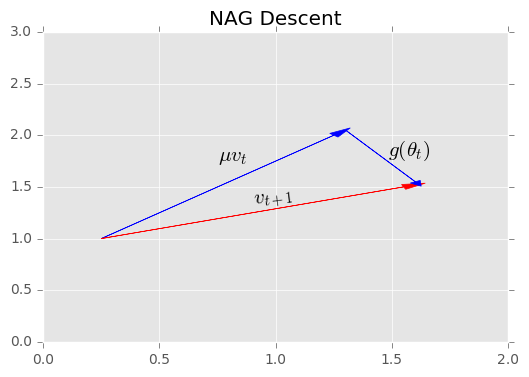

In [13]:
plt.figure()
plt.ylim(0, 3)
plt.xlim(0, 2)
plt.title("NAG Descent")
plt.arrow(0.25, 1., 1, 1, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(0.25, 1., 1.3, 0.5, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(1.3, 2.05, 0.3, -0.5,head_width=0.05, head_length=0.05, fc='b', ec='b')

plt.text(0.75, 1.75, r'$\mu v_t$', fontsize=15)
plt.text(1.485, 1.8, r'$g(\theta_t)$', fontsize=15)
plt.text(0.9, 1.375, r'$v_{t+1}$', fontsize=15, rotation=7)
plt.savefig('naggeom.png')

Essentially, Classical Momentum uses the gradient at the current step along with the momentum factor to update the parameter, while NAG performs a partial update through the gradient at $\theta_t + \mu v_t$ to provide a correction which is as yet unknown to CM.